[click Here](https://docs.google.com/document/d/1jI74CCC-7xB-NFV7981OFe8EK2Sie_tgzHZLPbs2XFY/edit?usp=sharing)

In [1]:
# importinfg the requred libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data set
df = pd.read_csv(r"titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Family'] = df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [5]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [6]:
#Based on the categories , we will analyze which people were more likely to survive
# low,mid,high
df['Fare_category']  = pd.cut(df.Fare, bins = [0,9.9,14.45,31.00,512],
                             labels = ['Low' , 'Mid', 'Mid-High', 'High'])
df[['Fare','Fare_category'] ]

,Fare,Fare_category
0,7.2500,Low
1,71.2833,High
2,7.9250,Low
3,53.1000,High
4,8.0500,Low
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


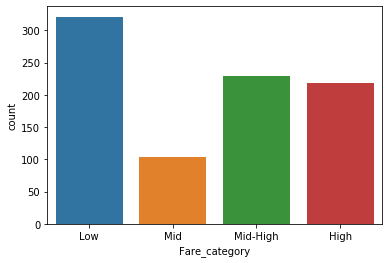

In [7]:
#visualizing Fare Category
sns.countplot(x = 'Fare_category', data = df)

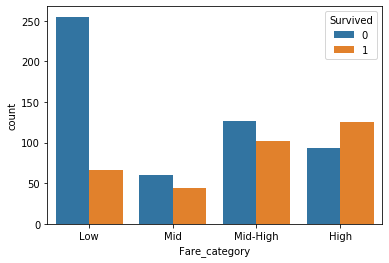

In [8]:
#Visualizing the count of categories based on survived 
sns.countplot(x = 'Fare_category', hue= 'Survived',data = df)

In [9]:
#Embarked --> From where the passengers had boarded the ship
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df.Embarked.value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

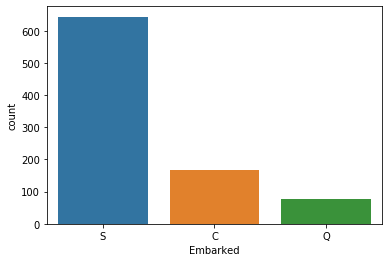

In [11]:
sns.countplot(x= 'Embarked' , data = df)

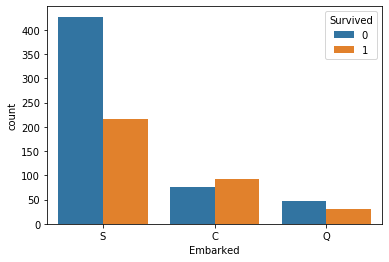

In [12]:
sns.countplot(x= 'Embarked' , hue= 'Survived',data = df)

In [13]:
#Imputing Missing Values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [14]:
#missing value is 77 % we cannot impute this column so filling nan values as na
df.Cabin.fillna('NA',inplace =True)
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
Family             0
Fare_category     18
dtype: int64

In [15]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
#nan values are substuted  with median of age column
df.Age.fillna(df.Age.median(),inplace = True)
df.Age.isna().sum()

0

In [17]:
#Imputing emabrked column with mode
df.Embarked.fillna(df.Embarked.mode()[0],inplace = True)
df.Embarked.isna().sum()

0

In [18]:
df.Fare_category.isna().sum()

18

In [19]:
#Imputing Fare_category column with mode
df.Fare_category.fillna(df.Fare_category.mode()[0],inplace = True)
df.Fare_category.isna().sum()

0

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Low


In [21]:
df['Age_Range'] = pd.cut(df.Age,[0,10,20,30,40,50,60,70,80])
df[['Age','Age_Range']].head()

,Age,Age_Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Low,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Low,"(30, 40]"


In [23]:
#Encoding categorical columns
dummy_set = pd.get_dummies(df.Fare_category,drop_first=True)

In [24]:
df = pd.concat([df,dummy_set],axis=1)

In [25]:
df= pd.concat([df,pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
              pd.get_dummies(df.Embarked,prefix='EMb',drop_first=True),
              pd.get_dummies(df.Fare_category,prefix='Fare',drop_first=True),
              pd.get_dummies(df.Age_Range,drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


In [26]:
#Enoding Age column
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df.drop(['Name','PassengerId','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_category','Age_Range','Cabin']
        ,axis=1,inplace=True)
df.head(7)

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [28]:
## Separating the Input and output data
#Input
X= df.drop('Survived',axis=1)
X.shape

(891, 165)

In [29]:
#output
y= df.iloc[:,0]
y.shape

(891,)

In [118]:
#seperating training data 
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 165)
(268, 165)
(623,)
(268,)


In [120]:
X_train

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
114,3,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
874,2,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
76,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
876,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
674,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
767,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72,2,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
235,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
y_train

114    0
874    1
76     0
876    0
674    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 623, dtype: int64

In [122]:
X_test

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
862,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
223,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
84,2,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
680,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,2,0,2,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2,0,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
551,2,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
239,2,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
484,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [123]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
247    1
551    0
239    0
484    1
92     0
Name: Survived, Length: 268, dtype: int64

In [124]:
pd.reset_option('display.max_columns')
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


For classification : we are classifying whether the passenger survived or not


In [125]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [126]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_train_pred = log_reg.predict(X_train)

In [128]:
(y_train == y_train_pred).value_counts()

True     531
False     92
Name: Survived, dtype: int64

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)*100

85.23274478330659

In [133]:
log_reg.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_test_pred = log_reg.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)*100

81.34328358208955

In [136]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills'], 'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2], 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [144]:
def multipliers ():

    return [lambda x: i * x for i in range (4)]

print([m(2) for m in multipliers()])

[6, 6, 6, 6]
